<a href="https://colab.research.google.com/github/Jenn-mawia/HamoyeAI/blob/main/Stage_B_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
df = pd.read_csv("energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [34]:
print(df.shape)
print('_________________')
print(df.dtypes)
print('_________________')
print(df.isnull().sum())

(19735, 29)
_________________
date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object
_________________
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0

<Axes: xlabel='T2', ylabel='T6'>

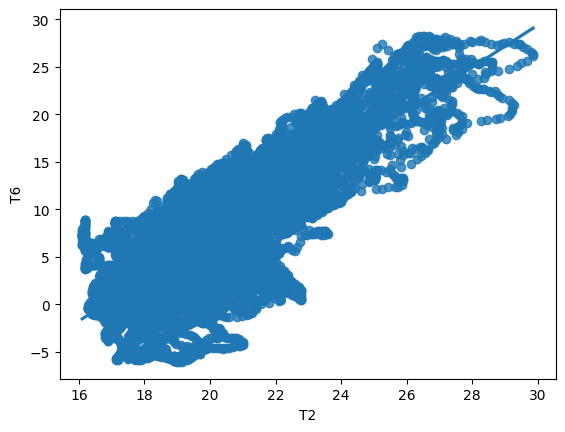

In [35]:
# Q12
'''
From the dataset, fit a linear model on the relationship between the temperature in the living room
in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?
'''
sns.regplot(x='T2', y='T6', data=df)

In [36]:
def Rsquared(x, y):
    n = len(x)

    num = (n * (x*y).sum()) - (x.sum() * y.sum())
    denominator = np.sqrt((n * (x**2).sum() - x.sum()**2) * (n * (y**2).sum() - y.sum()**2))
    R = num / denominator
    return R**2

r2 = Rsquared(df['T2'],df['T6'])
round(r2,2)


0.64

In [ ]:
# sns.jointplot(x=df['T2'], y=df['T6'], kind="reg")
# from scipy import stats
# def r2(x, y):
#     return stats.pearsonr(x, y)[0] ** 2
# sns.jointplot(x=df['T2'], y=df['T6'], kind="reg", stat_func=r2)

In [37]:
# Q13

data = df.drop(['date', 'lights'], 1)
# normalise the dataset to common scale
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

target = normalized_df['Appliances']
features = normalized_df.drop('Appliances', 1)

# split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 42)

linear_model = LinearRegression()

# fit model to the train set
linear_model.fit(x_train, y_train)

# obtain predictions
predicted_values = linear_model.predict(x_test)

# MAE
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

<ipython-input-37-952803d092a0>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = df.drop(['date', 'lights'], 1)
<ipython-input-37-952803d092a0>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  features = normalized_df.drop('Appliances', 1)


0.05

In [38]:
# Question 14
# What is the Residual Sum of Squares (in two decimal places)?

residual_sum = np.sum(np.square(y_test - predicted_values))
round(residual_sum,2)

45.35

In [39]:
# Q15
# What is the Root Mean Squared Error (in three decimal places)?
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

In [40]:
# Q16
# What is the Coefficient of Determination (in two decimal places)?
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

In [41]:
# Q17
# Obtain the feature weights from your linear model above. Which features have the
# lowest and highest weights respectively?
linear_weights = pd.DataFrame(features.columns, linear_model.coef_)
linear_weights.sort_index(ascending=False)

,0
0.553547,RH_1
0.290627,T3
0.236425,T6
0.117758,Tdewpoint
0.101995,T8
0.096048,RH_3
0.038049,RH_6
0.029183,Windspeed
0.028981,T4
0.026386,RH_4


In [42]:
# Q18
# Train a ridge regression model with an alpha value of 0.4. Is there any change
# to the root mean squared error (RMSE) when evaluated on the test set?
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

# obtain predictions
ridge_pred = ridge_reg.predict(x_test)

# RMSE ridge
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
round(ridge_rmse,3)

0.088

In [43]:
# Q19
# Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it.
# How many of the features have non-zero feature weights?

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

# obtain predictions
lasso_pred = lasso_reg.predict(x_test)

# obtain feature weights
lasso_weights = pd.DataFrame(features.columns, lasso_reg.coef_)
lasso_weights.sort_index(ascending=False)

,0
0.017880,RH_1
0.002912,Windspeed
0.000000,T1
-0.000000,T7
-0.000000,rv1
0.000000,Tdewpoint
0.000000,Visibility
-0.000000,Press_mm_hg
0.000000,T_out
-0.000000,RH_9


In [44]:
# Q20
# What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
round(lasso_rmse,3)

0.094